# Some dependencies

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [29]:
path = '../shared_data/round1/'
days = [-2, -1, 0]

activity = [pd.read_csv(path + f'prices_round_1_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [3]:
trade = [pd.read_csv(path + f'trades_round_1_day_{d}_nn.csv', sep=';', ).assign(day=d) for d in days]
trade = pd.concat(trade)
trade

,timestamp,buyer,seller,symbol,currency,price,quantity,day
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1,-2
1,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1,-2
2,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1,-2
3,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6,-2
4,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2,-2
...,...,...,...,...,...,...,...,...
5312,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1,0
5313,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1,0
5314,999500,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2,0
5315,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2,0


# Split the data to prepare the backtester

From the log file generated by the prosperity server, it seems that the algorithm was tested on day-0 data with first 1000 iterations.
Then to get a result from the backtester that is comparable with the prosperity server, we need to prepare a small dataset with the same data for the backtester.
In principle, the server should generate higher profit than the backtester because of the hidden orders.

In [17]:
activity_small = activity[(activity.day == 0) & (activity.timestamp < 100_000)]
activity_small


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,99700,AMETHYSTS,10002,1,9998.0,1.0,9996.0,1.0,10004,1,10005.0,28.0,NaN,NaN,10003.0,0.0
1996,0,99800,AMETHYSTS,9998,3,9996.0,1.0,9995.0,25.0,10004,1,10005.0,25.0,NaN,NaN,10001.0,0.0
1997,0,99800,STARFRUIT,5050,25,NaN,NaN,NaN,NaN,5052,3,5057.0,26.0,NaN,NaN,5051.0,0.0
1998,0,99900,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0


In [30]:

activity_small.to_csv('../shared_data/round6/prices_round_6_day_0.csv', sep=';', index=False, float_format='%g')

In [31]:
trade_small = trade[(trade.day == 0) & (trade.timestamp < 100_000)]
trade_small.drop(columns=['day'], inplace=True)
trade_small.to_csv('../shared_data/round6/trades_round_6_day_0_nn.csv', sep=';', index=False, float_format='%g')

/tmp/ipykernel_538332/2075899085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_small.drop(columns=['day'], inplace=True)


# Visualize the trades

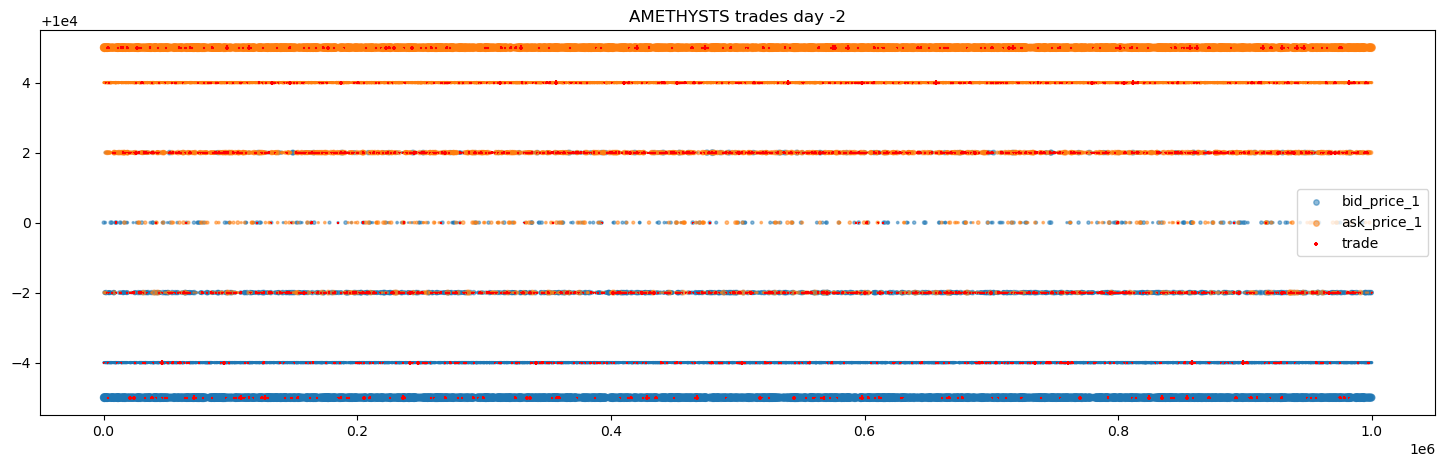

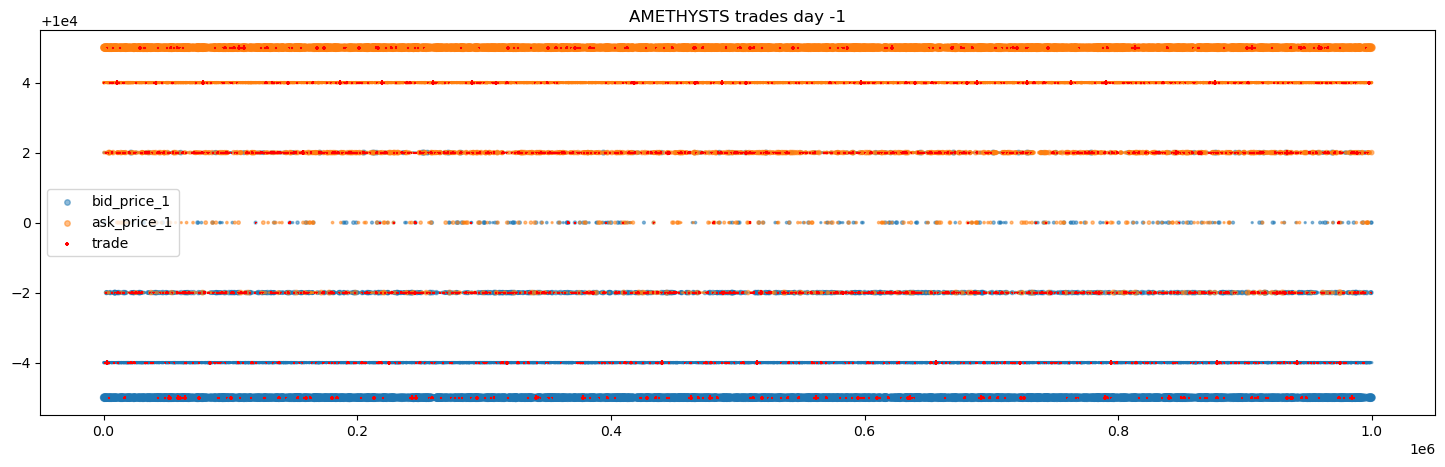

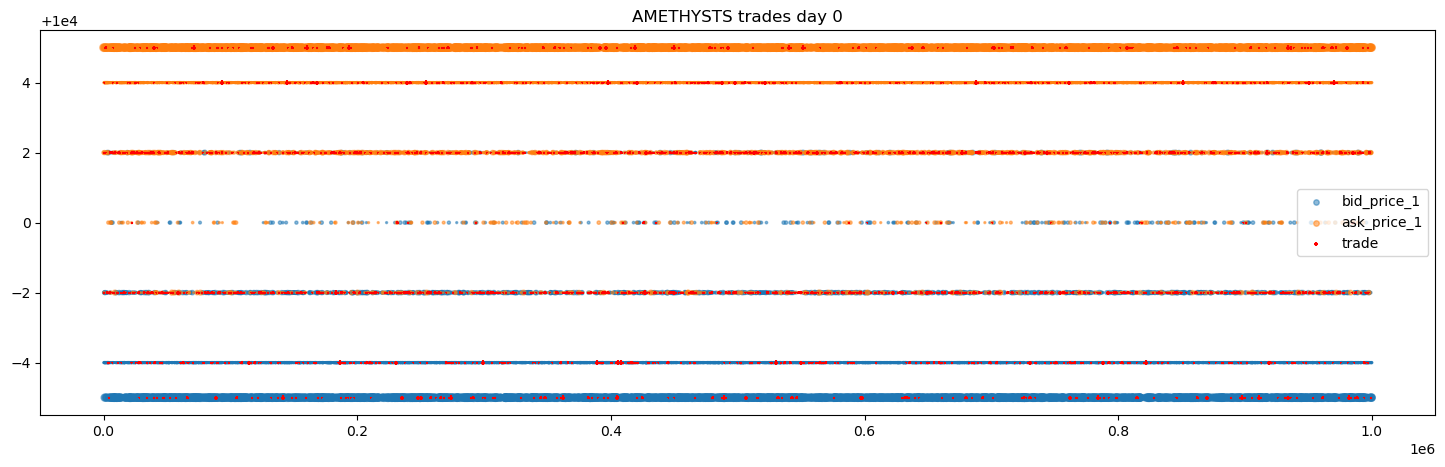

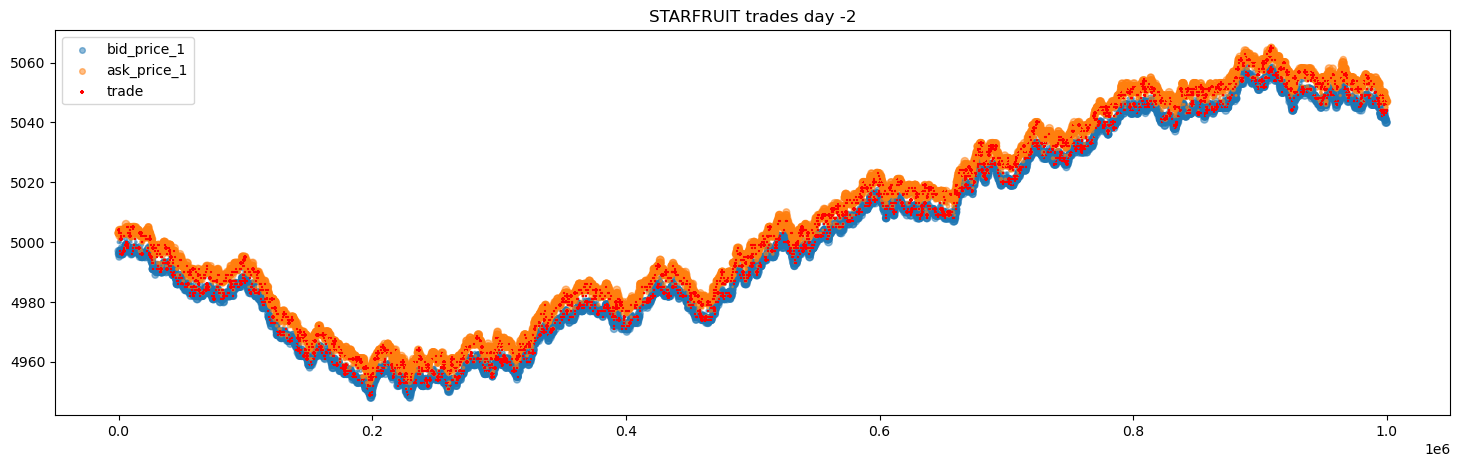

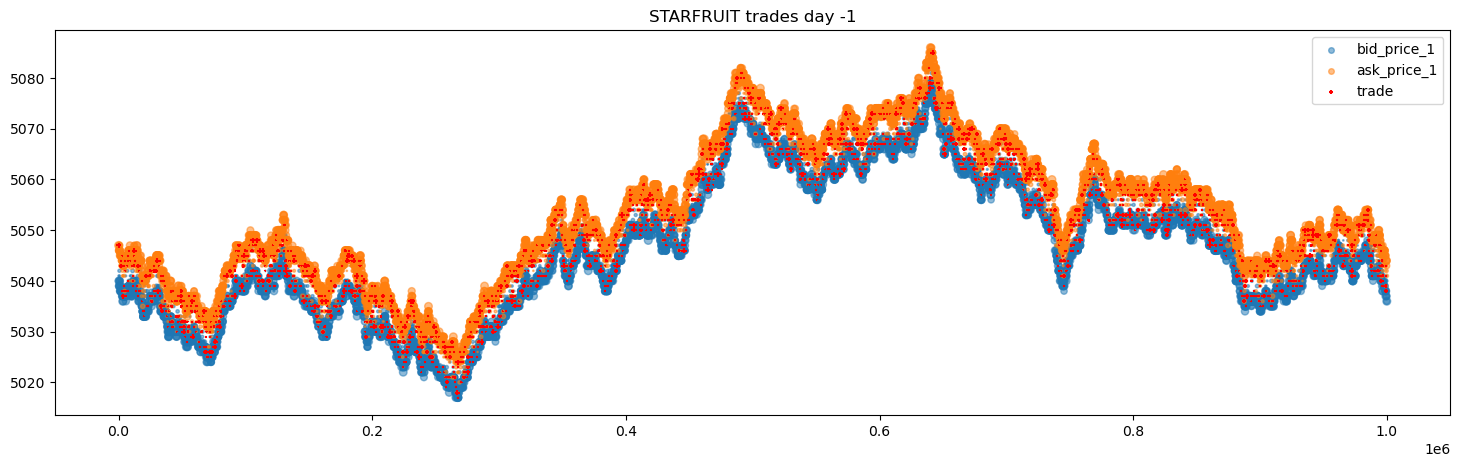

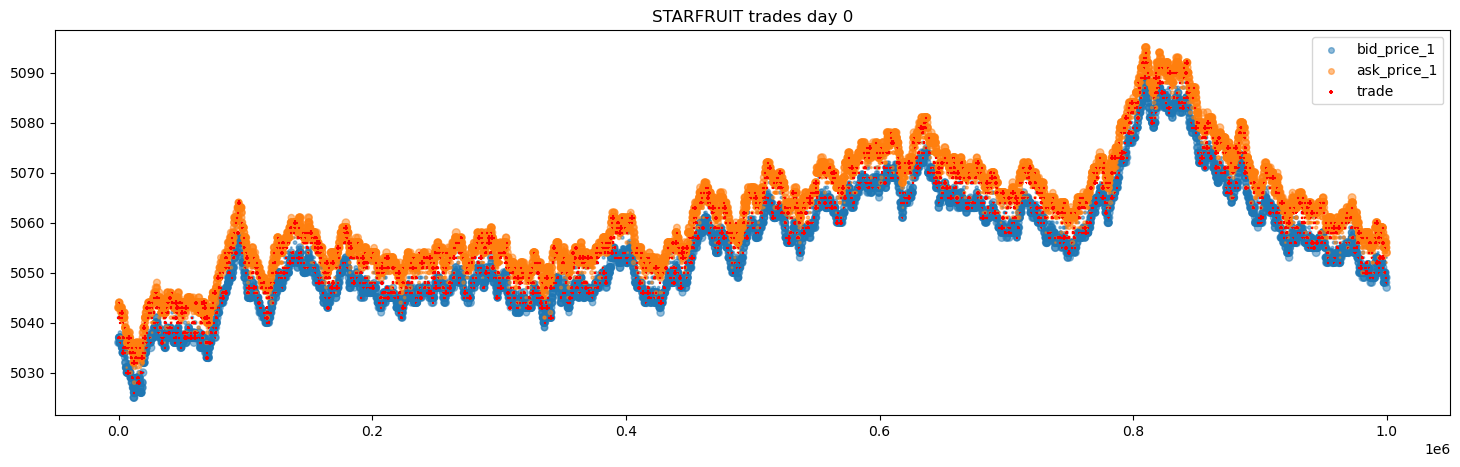

In [4]:
products = activity['product'].unique()

for product in products:
    for d in days:
        product_trade = trade[(trade.day == d) & (trade.symbol == product)]
        product_activity = activity[(activity['product'] == product) & (activity['day'] == d)]

        plt.figure(figsize=(18, 5))
        plt.scatter(product_activity['timestamp'], product_activity['bid_price_1'], label='bid_price_1', s=product_activity['bid_volume_1'], alpha=0.5)
        plt.scatter(product_activity['timestamp'], product_activity['ask_price_1'], label='ask_price_1', s=product_activity['ask_volume_1'], alpha=0.5)
        plt.scatter(product_trade.timestamp, product_trade.price, s=product_trade.quantity, label='trade', c='red', marker='+')
        plt.legend()
        plt.title(f'{product} trades day {d}')
        plt.show()

In [16]:
import numpy as np

any(activity.bid_price_1 < activity.bid_price_2)

False